# 2D Poisson problem with TV denoising using MYULA (Part 2)

This script builds on the accompanying script `Poisson_2D_MYULA_Part1.ipynb` to provide code for figure 13 in section 5.2.4 of the paper. Here we explore the effect of varying the TV strength parameter.

### Imports

In [1]:

from cuqipy_fenics.testproblem import FEniCSPoisson2D
from cuqi.samples import Samples
import numpy as np
import cuqi
import cuqipy_fenics
import dolfin as dl
import matplotlib.pyplot as plt
import os
from pde_myula_utils import plot_figure_13

# Set logging level of dl
dl.set_log_level(dl.LogLevel.ERROR)

### Print CUQIpy and CUQIpy-FEniCS versions:

In [2]:
print(cuqi.__version__)
print(cuqipy_fenics.__version__)

1.3.0
0.8.0


### Parameters

In [3]:
# Set random seed for reproducibility
np.random.seed(0)

nx = 32 # (For nx by nx mesh)

### Generate posterior samples for different TV strength values

We use the command line to run the notebook `Poisson_2D_MYULA_Part1.ipynb` multiple times with different TV strength parameters. The results are saved in separate files which are then read in the next part of this notebook. Note that here we run the 6 cases sequentially, but in reality we actually ran them in parallel on a computing cluster since they are very costly. This is possible since the cases are independent of each other. The command below is commented out because it has already been run on the cluster and the results saved.


In [4]:
rest_strength_factor = [1.0, 5.0, 7.0, 10.0, 20.0, 30.0]

# Run the notebook with different TV strength parameters
#for i, rest_str in enumerate(rest_strength_factor):
#    ! NB_ARGS=' --TV_strength_factor {rest_str}' jupyter nbconvert --execute --to notebook Poisson_2D_MYULA_Part1.ipynb --output Poisson_2D_MYULA_Part1_{rest_str}.ipynb

### Obtain the domain geometry from the forward model

We obtain the domain geometry from the forward model built using a CUQIpy-FEniCS test problem. We need the geometry to create the `Samples` object.

In [5]:
domain_geometry = FEniCSPoisson2D(
    dim=(nx, nx),
    field_type=None,
    mapping="exponential",  # to infer log-conductivity
    bc_types=["Dirichlet", "Dirichlet", "Dirichlet", "Dirichlet"],
).model.domain_geometry

### Plot results

In [6]:
# Read samples for all TV strength factor cases
dir = "./results/"

data_list = []

# Read the numpy samples and wrap them into CUQI Samples object
for i, rest_str in enumerate(rest_strength_factor):
    expr_tag = f"_nx_{nx}_rest_str_{rest_str}"
    data = np.load(dir + "posterior_samples_2D" + expr_tag + ".npz")
    data_list.append(
        Samples(data["posterior_samples"], geometry=domain_geometry))

Plot figure 13

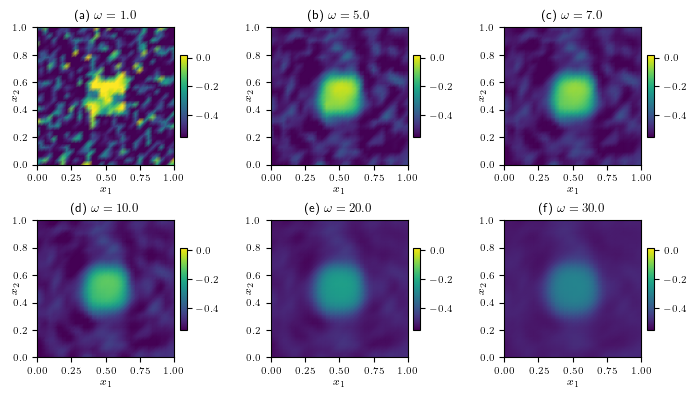

In [7]:
# Plot figure 13
plot_figure_13(data_list, rest_strength_factor)

# Figure directory
fig_dir = './figs/'

# Check if the directory exists
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Figure version
version = 'v8'

# Figure file
fig_file = fig_dir + 'paper_figure2_'+version+'.pdf'

# Save the figure
plt.savefig(fig_file, bbox_inches='tight', pad_inches=0.01, dpi=600)
